# <p style="text-align: center;">EE 379K: Data Science Lab</p>
# <p style="text-align: center;">Lab 2 - 9/18/17</p>
## <p style="text-align: center;">Rachel Chen and Kevin Yee</p>
### <p style="text-align: center;"> rjc2737 and kjy252</p>


## 1. Correlations

###(a) 
When given a data matrix, an easy way to tell if any two columns are correlated is to
look at a scatter plot of each column against each other column. For a warm up, do this:
Look at the data in DF1 in Lab2.zip. Which columns are (pairwise) correlated? Figure
out how to do this with Pandas, and also how to do this with Seaborn.



In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns

In [4]:
#Read csv into pandas
colNames = pd.Series(['A',' B','C', 'D'])
df = pd.DataFrame.from_csv("Lab2_Data/DF1")
df.columns = colNames;

#verify data is correct
df.head()

,A,B,C,D
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079


C:\Users\kevjy\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


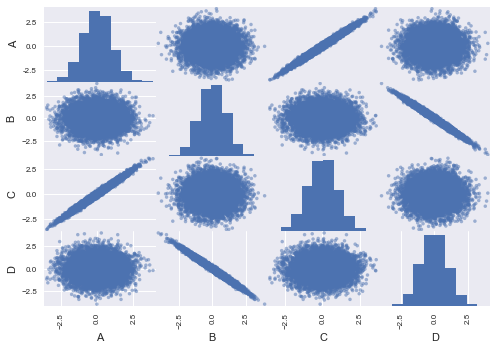

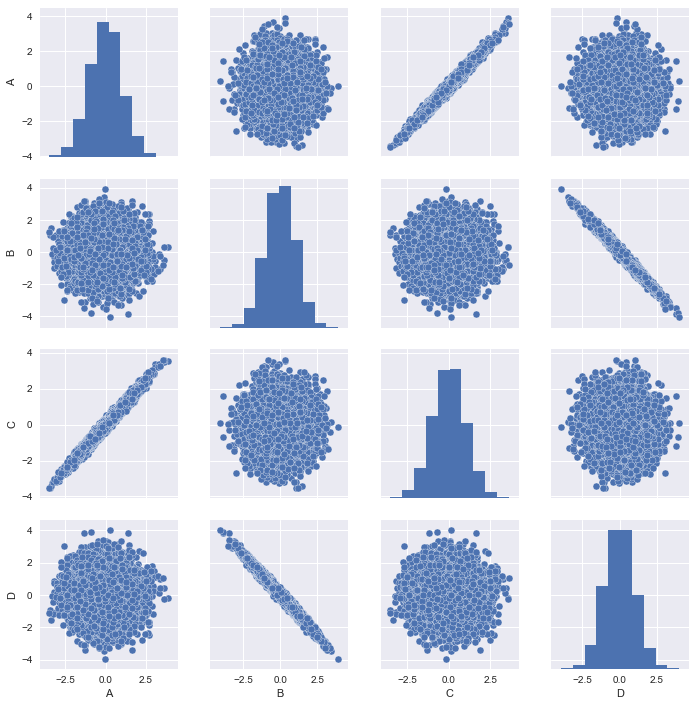

In [5]:
scatter_matrix(df);

sns.pairplot(df);
sns.plt.show();

### (b) 
Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4  4 matrix.
Explain why the numbers that you get t with the plots you got.


In [6]:
df.cov()

,A,B,C,D
A,1.001558,-0.004012,0.991624,0.004125
B,-0.004012,1.005378,-0.004099,-0.995457
C,0.991624,-0.004099,1.001589,0.004081
D,0.004125,-0.995457,0.004081,1.005168


$$\sum = 
\begin{bmatrix}
    \phi_1^2 & \phi_{12} &  \phi_{13} & \phi_{14} \\
    \phi_{21} & \phi_2^2 &  \phi_{23} & \phi_{24} \\
    \phi_{31} & \phi_{32} & \phi_{3}^2 & \phi_{34} \\
    \phi_{41} & \phi_{42} & \phi_{43}^2 & \phi_{44}
\end{bmatrix} $$

The covariance matrix is defined above, where the covariance between $$ Cov_{i}{j} $$ designates the correlation between the two columns.

In the dataset provided by DF1, we can see columns C and A have a positive correlation of 0.99 and columns B and D have a negative correlation of -0.99

### (c) 
The above problem in reverse. Generate a zero-mean multivariate Gaussian random
variable in 3 dimensions, $$Z = (X1;X2;X3)$$ so that $$(X1;X2)$$ and $$(X1;X3)$$ are uncorre-
lated, but $$(X2;X3)$$ are correlated. 

Specically: choose a covariance matrix that has the
above correlations structure, and write this down. Then nd a way to generate samples
from this Gaussian. 

Choose one of the non-zero covariance terms (Cij , if C denotes your covariance matrix) and plot it vs the estimated covariance term, as the number of
samples you use scales. 

The goal is to get a visual representation of how the empirical
covariance converges to the true (or family) covariance.

We can define the covariance matrix as follows:

$$\sum = 
\begin{bmatrix}
    \phi_1^2 & \phi_{12} &  \phi_{13}\\
    \phi_{21} & \phi_2^2 &  \phi_{23} \\
    \phi_{31} & \phi_{32} & \phi_{3}^2  
\end{bmatrix} $$

C:\Users\kevjy\Anaconda\lib\site-packages\numpy\lib\function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\kevjy\Anaconda\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\kevjy\Anaconda\lib\site-packages\pandas\core\frame.py:5000: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
C:\Users\kevjy\Anaconda\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
C:\Users\kevjy\Anaconda\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


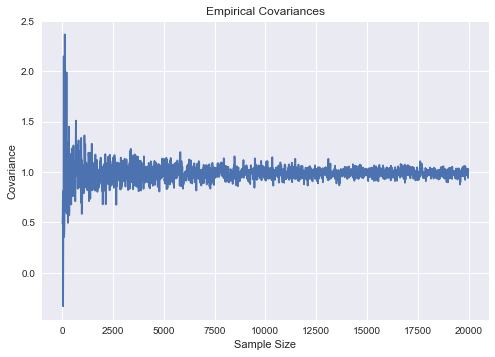

In [7]:
#Generate zero mean multivariate
#X2 and X3 are correlated
mean = [0, 0, 0]
cov = [[5, 0, 0],
        [0, 5, 0.99],
        [0, 0.99, 5]]

#Generate random samples from this gaussian
rv = np.random.multivariate_normal(mean,cov,100000)
df = pd.DataFrame(rv, columns = ['X1', 'X2', 'X3'])


samples = []
covariances = []
#Plot vs estimated covariance term, as the number of samples you use scale
for numsamples in range(0, 20000, 10):
    rv = np.random.multivariate_normal(mean,cov,numsamples)
    covar23 = pd.DataFrame(rv, columns = ['X1', 'X2', 'X3']).cov().loc['X2']['X3']
    
    samples.append(numsamples)
    covariances.append(covar23)



plt.title('Empirical Covariances')
plt.xlabel('Sample Size')
plt.ylabel('Covariance')
plt.plot(samples,covariances)
    

## 2. Outliers. 
Consider the two-dimensional data in DF2 in Lab2.zip. Look at a scatter plot
of the data. It contains two points that look like potential outliers. Which one is “more”
outlying? Propose a transformation of the data that makes it clear that the point at (−1, 1)
is more outlying than the point at (5.5, 5), even though the latter point is“farther away”
from the nearest points. Plot the data again after performing this transformation. Provide
discussion as appropriate to justify your choice of transformation. Hint: if y comes from a
standard Gaussian in two dimensions (i.e., with covariance equal to the two by two identity
matrix), and
$$Q = \begin{bmatrix}
    2       & \frac{1}{2} \\
    \frac{1}{2}       & 2
\end{bmatrix}$$
what is the covariance matrix of the random variable z = Qy? If you are given z, how would
you create a random Gaussian vector with covariance equal to the identity, using z?

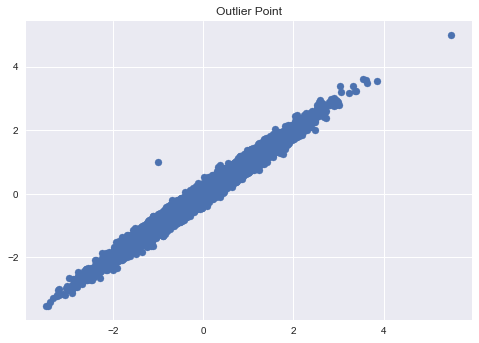

In [8]:
#Read from CSV file
df = pd.DataFrame.from_csv("Lab2_Data/DF2")

#plot of untransformed data
plt.scatter(df['0'],df['1'])
plt.title("Outlier Point")

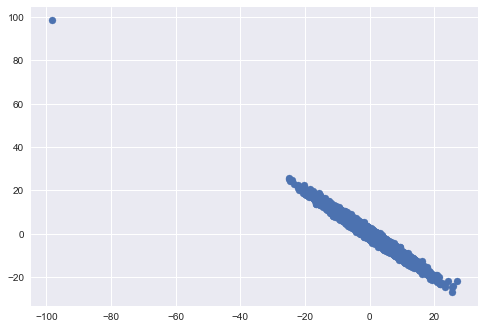

In [9]:
#covariance
cov = df.cov()

#inverse covariance
cov_inv = pd.DataFrame(np.linalg.pinv(cov.values))

# Find Y = A^-1 * X where Y has the the identity matrix
# Where Cov = A * A^T 

# Transform the data and plot again
data = pd.DataFrame(np.dot(df,cov_inv))

colnames = ['A','B']
data.columns = colnames

plt.scatter(data['A'],data['B'])

Why the above statement works? 

<img src="Images/ExplanationOfMahalanobonis.png">

## 3. Even More Standard Error

<img src="Images/Q3P1.png">
<img src="Images/Q3P2.png">

## Answer
### Part 1

$$y_i = \beta_0  + x_i \beta + e_i$$

where $\beta_0 = -3$ and $\beta = 0$
$X_i = N(0,1)$

In [21]:
def stdError(n):
    errors = []
    for i in range(1000):
        betanot = -3
        beta = 0
        Xnorm = np.random.normal(0, 1, n)
        Enoise = np.random.normal(0,1, n)
        Y = betanot + beta*Xnorm + Enoise
    
        betahat = np.dot(Xnorm, Y)/np.dot(Xnorm,Xnorm)
        error = betahat - beta
        errors.append(error)
    return np.std(errors)

In [22]:
stdError(150)

0.26167694619007836

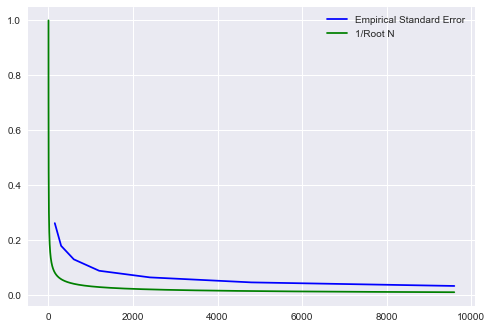

In [26]:
yErrors = []
numSamples = [150, 300, 600, 1200, 2400, 4800, 9600]
for i in range(len(numSamples)):
    yErrors.append(stdError(numSamples[i]))

xSqrt = []
ySqrt = []
for i in range(1,9600):
    xSqrt.append(i)
    ySqrt.append(1/np.sqrt(i))

plt.plot(numSamples, yErrors, color = 'b', label = 'Empirical Standard Error')
plt.plot(xSqrt, ySqrt, color = 'g', label = '1/Root N')
plt.legend()

## 4. Names and Frequencies
The goal of this exercise is for you to get more experience with
Pandas, and to get a chance to explore a cool data set. Download the file Names.zip from
Canvas. This contains the frequency of all names that appeared more than 5 times on a social
security application from 1880 through 2015.

* Write a program that on input k and XXXX, returns the top k names from year
XXXX.

* Write a program that on input Name returns the frequency for men and women of the
name Name.

* It could be that names are more diverse now than they were in 1880, so that a name
may be relatively the most popular, though its frequency may have been decreasing over
the years. Modify the above to return the relative frequency.

* Find all the names that used to be more popular for one gender, but then became more
popular for another gender.

* (Optional) Find something cool about this data set.

In [ ]:
k = int(input("Enter the number of top names: "))
year = int(input("Enter the year would like to search: "))
while(year < 1880 or year > 2015):
    year = int(input("Please enter another year between 1880 and 2015"))
df = pd.read_csv("Names/yob"+str(year)+".txt", sep=',', names=['name', 'gender', 'freq'])

#print
print(df.sort_values('freq', ascending=False).head(k))

In [ ]:
name = input("Enter the name: ")
filenames = ['Names/yob%s.txt' % year for year in range(1880, 2016)]
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, sep=',', names=['name', 'gender', 'freq']))
name_count_female = 0
name_count_male = 0

for df in dfs:
    df_name = df.loc[df['name'] == name]
    females = df_name.loc[df_name['gender'] == 'F'].freq
    males = df_name.loc[df_name['gender'] == 'M'].freq
    if len(females) > 0:
        name_count_female += females.values[0]
    if len(males) > 0:
        name_count_male += males.values[0]
print 'Female: %d, Male: %d' % (name_count_female, name_count_male)

## 5. Visualization Tools and Missing/Hidden Values. 

Visualization is important both for
exploring the data, as well as for explaining what you have done. There are a huge number
of such tools now available. This exercise walks through various functionalities of matplotlib
and pandas.
* The first part of this exercise was created by Dataquest. Run through the commands
given in this tutorial: https://www.dataquest.io/blog/matplotlib-tutorial/ and under-
stand the code.

* Suppose that you would now like to plot some of the results by state. As you will see,
the state information is sometimes missing, and other times it comes in varying forms.
Figure out how to aggregate the results by state. The challenge here: how many of the
tweets can you (correctly) assign to a state? Note: depending on how well you want to
do (i.e., how many tweets you want to correctly assign to their state), this is not an easy
problem!

## 1.  Standard Error: 
It is important to develop an intuition for how much error we should
expect" when we solve a particular statistical problem. As the number of sample increase, we
should expect the error to decrease. But by how much? In the rst lab, you generated samples
from a univariate (Problem 3) and multivariate (Problem 4) Gaussian with given parameters,
and then you were asked to estimate those parameters from the data you generated. In this
exercise, we derive explicitly the relationship that you (should have) observed doing those
exercises.

* Suppose $Z = N(\mu; \theta^2)$, i.e., Z is a univariate Gaussian (a.k.a. normal) random variable with
mean $\mu$ and variance $\theta^2$. Suppose that you see n samples from Z, i.e., you see data $z_1, \dots, z_n.$
Let $$z_{avg} = \sum_{i=1}^n \frac{z_i}{n}$$ denote the sample mean. 

We want to answer: how close is $z_{avg}$ to  $\mu$?

Note that $z_{avg}$ is a random variable so we need to quantify in a probabilistic way how close
$z_{avg}$ is to $\mu$.

* Suppose Z ~ $N(0, 1)$. This is also called a standard normal random variable. For
n = 10,000, compute the probability that $z_{avg}$ > 0.1, $z_{avg}$ > 0.01, and $z_{avg} > 0.001$.

* Now for the general case: suppose $Z = N(\mu; \theta^2)$, and for general n, compute the probability that 
$z_{avg} > n^{\frac{-1}{3}}$, $z_{avg} > n^{\frac{-1}{2}}$, and $z_{avg} > n^{\frac{-2}{3}}$. For your calculations,
you can let n scale if that makes things easier.

## Answer

$$P(z_{avg} > c)$$

Re-arrange variables
$$P(S_{n} > c*n)$$

Using Central Limit Theorem
$$P(\frac{S_{n}}{\sqrt{n}*\theta} > \frac{0.1*n}{\sqrt{n}*\theta})$$


$$P(Z_{n} > 0.1*\sqrt{n})$$

Standard Normal
$$1 - P(Z_{n} < c*{\sqrt{10000}})$$


Replace:

c = 0.1
$$P(z_{avg} > 0.1)$$

$$1 - P(Z_{n} < 10) = 0$$

c = 0.01
$$P(z_{avg} > 0.01)$$
$$1 - P(Z_{n} < 1) = 0.16$$

c = 0.001
$$P(z_{avg} > 0.001)$$

$$1 - P(Z_{n} < 0.1) = 0.46$$


#### General Case 

$$Z = N(\mu; \theta^2)$$

$$P(Z_{avg} > c)$$

Using Central Limit Theorem
$$P(\frac{S_{n}-(n*\mu)}{\sqrt{n}*\theta} > \frac{c*n-(n*\mu)}{\sqrt{n}*\theta})$$

##### For $c = n^{-1/3}$
$$P(Z_{n} > \frac{n^{-1/3}*n-(n*\mu)}{\sqrt{n}*\theta})$$

$$P(Z_{n} > \frac{n^{2/3}-(n*\mu)}{\sqrt{n}*\theta})$$





##### For $c = n^{-1/2}$
$$P(Z_{n} > \frac{n^{-1/2}*n-(n*\mu)}{\sqrt{n}*\theta})$$

$$P(Z_{n} > \frac{n^{1/2}-(n*\mu)}{\sqrt{n}*\theta})$$






##### For $c = n^{-2/3}$
$$P(Z_{n} > \frac{n^{-2/3}*n-(n*\mu)}{\sqrt{n}*\theta})$$

$$P(Z_{n} > \frac{n^{1/3}-(n*\mu)}{\sqrt{n}*\theta})$$

<img src="Images/Q2P1.png">

<img src="Images/Q2P2.png">

## Answer:

### Part 1
When we have n data points, the least square objective reads:


$$min \beta = \frac{1}{n} \sum _{i=1}^{n}(x_i \beta - y_i)^2$$

We can show that $\beta$ is a quadratic formula of the form $A \beta^2 + B \beta + C $

Multiplying out


$$min \beta = \frac{1}{n} [\sum _{i=1}^{n}(x_{i}^2 \beta^2 -2X_i \beta y_i + y_{i}^2]$$

Expand out 

$$min \beta = \beta^2 \frac{1}{n} \sum _{i=1}^{n}x_{i}^2 - \beta \frac{2}{n} \sum _{i=1}^{n}2x_i y_i + \frac{1}{n} \sum _{i=1}^{n}y_{i}^2$$

where 
$$ A = \beta^2 \frac{1}{n} \sum _{i=1}^{n}x_{i}^2 $$
$$ B = \beta \frac{2}{n} \sum _{i=1}^{n}2x_i y_i $$
$$ C = \frac{1}{n} \sum _{i=1}^{n}y_{i}^2 $$

Notice A is a quadratic and $A \geq 0$

### Part 2

Solve for $\beta$

$$\frac{d}{d\beta}(\frac{1}{n}\sum_{i=1}^n(X_i \beta - y_i)^2) = \frac{2}{n} \sum_{i=1}^n(X_i \beta - y)X_i) = 0$$

$$ \sum_{i=1}^n(X_i^2 \beta - X_iY_i) = 0 $$

$$\therefore \beta = \frac{\sum_{i=1}^{n} X_iY_i}{\sum_{i=1}^{n} X_i^2}$$

### Part 3
Plugging in $y_i = x_i \beta + e_i$ write $\hat{\beta} = \beta + Z*e$

$$ \hat{\beta} = \frac{\sum_{i=1}^{n}X_i(X_i \beta + e_i)}{\sum_{i=1}^{n}X_i^2} $$




$$ \hat{\beta} = \frac{\sum_{i=1}^{n}(X_i^2 \beta + X_i e_i)}{\sum_{i=1}^{n}X_i^2} $$




$$ \hat{\beta} = \frac{\beta \sum_{i=1}^{n}(X_i^2  + X_i e_i)}{\sum_{i=1}^{n}X_i^2} $$




$$ \hat{\beta} = \beta + \frac{\sum_{i=1}^{n}(X_i e_i)}{\sum_{i=1}^{n}X_i^2} $$




$$ \hat{\beta} = \beta + \frac{X^T * e}{X^T X} $$


Using $\hat{\beta} = \beta + Z*e$

$$Z = \frac{X^T}{X^T*X}$$